In [2]:
''' Packages'''
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from utils import *

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#make all random function calls constant
np.random.seed(1)

In [3]:
''' Dataset'''  

train_set_input, train_set_label, test_set_input, test_set_label, classes = load_data()


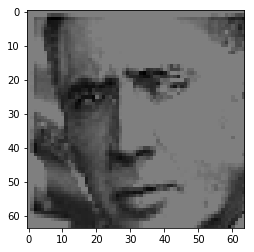

y = 1. It's a male picture.


In [5]:
# Example of picture
index = 10
plt.imshow(train_set_input[index])
plt.show()
print("y = " + str(train_set_label[0, index]) + ". It's a " + str(classes[train_set_label[0, index]]) + " picture.")


In [8]:
# Explore your dataset
num_train_data = train_set_input.shape[0]
num_px = train_set_input.shape[1]
num_test_data = test_set_input.shape[0]

print ("Number of training examples: " + str(num_train_data))
print ("Number of testing examples: " + str(num_test_data))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_input shape: " + str(train_set_input.shape))
print ("train_set_label shape: " + str(train_set_label.shape))
print ("test_set_input shape: " + str(test_set_input.shape))
print ("test_set_label shape: " + str(test_set_label.shape))

Number of training examples: 1000
Number of testing examples: 500
Each image is of size: (64, 64, 3)
train_set_input shape: (1000, 64, 64, 3)
train_set_label shape: (1, 1000)
test_set_input shape: (500, 64, 64, 3)
test_set_label shape: (1, 500)


In [9]:
# Reshape the training and test examples
train_x_flatten = train_set_input.reshape(train_set_input.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_set_input.reshape(test_set_input.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 1000)
test_x's shape: (12288, 500)


# Implement a two layer network

In [10]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [11]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    gradients = {}
    costs = []  # to keep track of the cost
    m = X.shape[1]  # number of examples
    (n_x, n_h, n_y) = layers_dims

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        ### END CODE HERE ###

        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###

        # Set gradients['dWl'] to dW1, gradients['db1'] to db1, gradients['dW2'] to dW2, gradients['db2'] to db2
        gradients['dW1'] = dW1
        gradients['db1'] = db1
        gradients['dW2'] = dW2
        gradients['db2'] = db2

        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, gradients, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.6929811239232038
Cost after iteration 100: 0.6926912219698127
Cost after iteration 200: 0.6922164813543911
Cost after iteration 300: 0.6914242951655148
Cost after iteration 400: 0.6900844190638522
Cost after iteration 500: 0.6878873266914748
Cost after iteration 600: 0.6845645256945968
Cost after iteration 700: 0.6801810065509478
Cost after iteration 800: 0.675286814719802
Cost after iteration 900: 0.6705352535812904
Cost after iteration 1000: 0.6660435298421367
Cost after iteration 1100: 0.6615241845667368
Cost after iteration 1200: 0.6567427931046396
Cost after iteration 1300: 0.6514663158459253
Cost after iteration 1400: 0.645662274813737
Cost after iteration 1500: 0.6393421103464055
Cost after iteration 1600: 0.6324833711654725
Cost after iteration 1700: 0.6250396646855996
Cost after iteration 1800: 0.6170705763305856
Cost after iteration 1900: 0.6086470582029778
Cost after iteration 2000: 0.5998422478481686
Cost after iteration 2100: 0.5907218177708731
Co

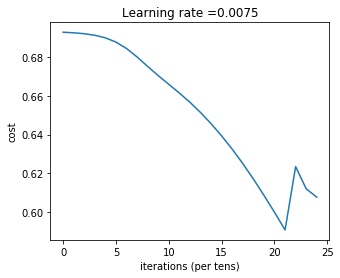

In [13]:
parameters = two_layer_model(train_x, train_set_label, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [14]:
predictions_train = predict(train_x, train_set_label, parameters)

Accuracy: 0.6590000000000001


In [15]:
predictions_test = predict(test_x, test_set_label, parameters)

Accuracy: 0.5720000000000001


#  Implement Multilayer Network

LINEAR -> SIGMOID. The functions you may need and their inputs are:

def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters

In [16]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

def four_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost= False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

       # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


Cost after iteration 0: 0.707308
Cost after iteration 100: 0.680761
Cost after iteration 200: 0.670928
Cost after iteration 300: 0.660198
Cost after iteration 400: 0.649282
Cost after iteration 500: 0.640802
Cost after iteration 600: 0.629975
Cost after iteration 700: 0.620080
Cost after iteration 800: 0.608495
Cost after iteration 900: 0.613773
Cost after iteration 1000: 0.595224
Cost after iteration 1100: 0.614183
Cost after iteration 1200: 0.569231
Cost after iteration 1300: 0.552923
Cost after iteration 1400: 0.561799
Cost after iteration 1500: 0.547619
Cost after iteration 1600: 0.579177
Cost after iteration 1700: 0.582980
Cost after iteration 1800: 0.556937
Cost after iteration 1900: 0.605797
Cost after iteration 2000: 0.577020
Cost after iteration 2100: 0.613103
Cost after iteration 2200: 0.516261
Cost after iteration 2300: 0.578665
Cost after iteration 2400: 0.467709


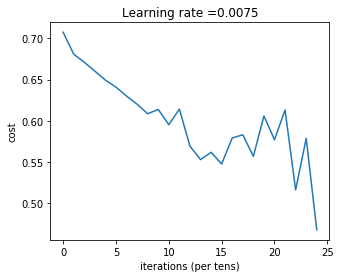

In [17]:
# predictions
parameters = four_layer_model(train_x, train_set_label, layers_dims, num_iterations = 2500, print_cost = True)


In [18]:
predict_train = predict(train_x, train_set_label, parameters)

Accuracy: 0.7200000000000002


In [19]:
predict_test = predict(test_x, test_set_label, parameters)

Accuracy: 0.5760000000000001


In [21]:
layers_dims = [12288,70, 40, 30, 26, 20, 10, 7, 5, 3, 1] #  10-layer model

def multi_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost= False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

       # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.693137
Cost after iteration 100: 0.692959
Cost after iteration 200: 0.692849
Cost after iteration 300: 0.692714
Cost after iteration 400: 0.692506
Cost after iteration 500: 0.692346
Cost after iteration 600: 0.692173
Cost after iteration 700: 0.691949
Cost after iteration 800: 0.691637
Cost after iteration 900: 0.691302
Cost after iteration 1000: 0.690927
Cost after iteration 1100: 0.690490
Cost after iteration 1200: 0.690049
Cost after iteration 1300: 0.689532
Cost after iteration 1400: 0.688938
Cost after iteration 1500: 0.688292
Cost after iteration 1600: 0.687537
Cost after iteration 1700: 0.686655
Cost after iteration 1800: 0.685649
Cost after iteration 1900: 0.684483
Cost after iteration 2000: 0.683066
Cost after iteration 2100: 0.681332
Cost after iteration 2200: 0.679304
Cost after iteration 2300: 0.676903
Cost after iteration 2400: 0.673981


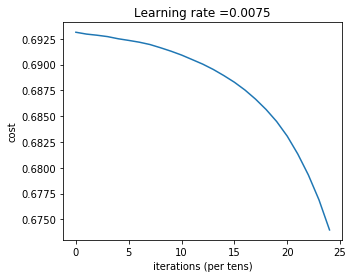

In [22]:
# predictions
parameters = multi_layer_model(train_x, train_set_label, layers_dims, num_iterations = 2500, print_cost = True)

In [24]:
predict_train_accuracy = predict(train_x, train_set_label, parameters)

Accuracy: 0.6310000000000001


In [25]:
predict_test = predict(test_x, test_set_label, parameters)

Accuracy: 0.544


# Result analysis

In [ ]:
print_mislabeled_images(classes, test_x, test_set_label, predict_test)